In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython import display
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
import pathlib

import numpy as np
import pandas as pd
import seaborn as sns

from ikapati.data import io
from ikapati.visualization import visualize

In [4]:
species = "Tomato"
data_dir = pathlib.Path("../data/processed")
train_dir = data_dir.joinpath(species)
model_dir = pathlib.Path("../models")
metadata_file_path = train_dir.joinpath("metadata.json")
base_dir = pathlib.Path.cwd()

print(f"species: {species} - train_dir: {str(train_dir)} - metadata_file_path: {str(metadata_file_path)}")

species: Tomato - train_dir: ../data/processed/Tomato - metadata_file_path: ../data/processed/Tomato/metadata.json


In [5]:
metadata = io.read_metadata(str(metadata_file_path))
model_id = metadata["id"]

print(f"model_id: {model_id}")

model_id: d57c545d-158d-4bd2-8474-1e3cc4eddf81


In [6]:
training_log_path = model_dir.joinpath(model_id, "training.log")

with open(training_log_path) as log_file:
    logs = log_file.readlines()
    training_logs = dict([log.strip().split("\t") for log in logs])
    
training_logs

{'relu': 'models/d57c545d-158d-4bd2-8474-1e3cc4eddf81/2020-02-03__00_3113',
 'relu-dropout': 'models/d57c545d-158d-4bd2-8474-1e3cc4eddf81/2020-02-03__00_4109'}

In [7]:
list(pathlib.Path("../models", model_id).glob("*/"))

[PosixPath('../models/d57c545d-158d-4bd2-8474-1e3cc4eddf81/2020-02-03__00_3113'),
 PosixPath('../models/d57c545d-158d-4bd2-8474-1e3cc4eddf81/training.log'),
 PosixPath('../models/d57c545d-158d-4bd2-8474-1e3cc4eddf81/2020-02-03__00_4109')]

## ReLU

In [8]:
model_metadata_file_path = pathlib.Path("..", training_logs["relu"], "metadata.json")
model_metadata = io.read_metadata(str(model_metadata_file_path))

In [9]:
model_metadata

{'id': 'd57c545d-158d-4bd2-8474-1e3cc4eddf81',
 'start_time': '2020-02-03__00_3113',
 'arguments': {'batch_size': 64,
  'epochs': 20,
  'monitor': 'val_loss',
  'activation': 'relu',
  'early_stopping': False,
  'architecture': 'alexnet',
  'dropout': False},
 'dataset': {'id': 'd57c545d-158d-4bd2-8474-1e3cc4eddf81',
  'species': 'Tomato',
  'num_classes': 10,
  'class_names': ['Tomato___Bacterial_spot',
   'Tomato___Early_blight',
   'Tomato___Late_blight',
   'Tomato___Leaf_Mold',
   'Tomato___Septoria_leaf_spot',
   'Tomato___Spider_mites Two-spotted_spider_mite',
   'Tomato___Target_Spot',
   'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
   'Tomato___Tomato_mosaic_virus',
   'Tomato___healthy'],
  'created_date': '2020-02-02 20:33:45',
  'file_counts': {'train': 14404, 'test': 1801, 'eval': 1801}},
 'history': {'loss': [1.3641438145107694,
   0.57825235247612,
   0.39501109063625334,
   0.3137024966213438,
   0.23523935821321276,
   0.2199179802586635,
   0.18477862058414354,
   0.1583

In [10]:
history = model_metadata["history"]

In [11]:
metrics_df = visualize.create_metrics_dataframe(history)

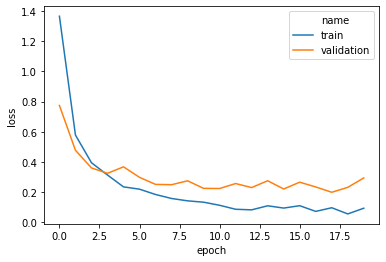

In [12]:
loss_plot = visualize.learning_curves("loss", metrics_df)

In [13]:
visualize.save_plot(loss_plot, f"../reports/figures/{species}-relu.loss.png")

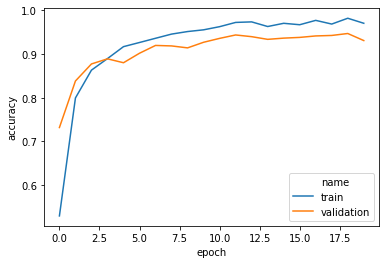

In [14]:
accuracy_plot = visualize.learning_curves("accuracy", metrics_df)

In [15]:
visualize.save_plot(accuracy_plot, f"../reports/figures/{species}-relu.accuracy.png")

## ReLU with Dropout

In [16]:
dropout_model_metadata_file_path = pathlib.Path("..", training_logs["relu-dropout"], "metadata.json")
dropout_model_metadata = io.read_metadata(str(dropout_model_metadata_file_path))

In [17]:
dropout_model_metadata

{'id': 'd57c545d-158d-4bd2-8474-1e3cc4eddf81',
 'start_time': '2020-02-03__00_4109',
 'arguments': {'batch_size': 64,
  'epochs': 20,
  'monitor': 'val_loss',
  'activation': 'relu',
  'early_stopping': False,
  'architecture': 'alexnet',
  'dropout': True},
 'dataset': {'id': 'd57c545d-158d-4bd2-8474-1e3cc4eddf81',
  'species': 'Tomato',
  'num_classes': 10,
  'class_names': ['Tomato___Bacterial_spot',
   'Tomato___Early_blight',
   'Tomato___Late_blight',
   'Tomato___Leaf_Mold',
   'Tomato___Septoria_leaf_spot',
   'Tomato___Spider_mites Two-spotted_spider_mite',
   'Tomato___Target_Spot',
   'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
   'Tomato___Tomato_mosaic_virus',
   'Tomato___healthy'],
  'created_date': '2020-02-02 20:33:45',
  'file_counts': {'train': 14404, 'test': 1801, 'eval': 1801}},
 'history': {'loss': [1.4733176702923245,
   0.6533923146459791,
   0.47794873317082726,
   0.3759185450938013,
   0.3139470095104641,
   0.2529789334204462,
   0.24778106956018342,
   0.2113

In [18]:
dropout_history = dropout_model_metadata["history"]

In [19]:
dropout_metrics_df = visualize.create_metrics_dataframe(dropout_history)

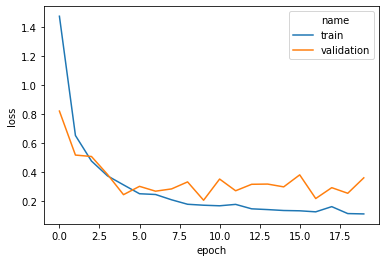

In [20]:
dropout_loss_plot = visualize.learning_curves("loss", dropout_metrics_df)

In [21]:
visualize.save_plot(dropout_loss_plot, f"../reports/figures/{species}-relu-dropout.loss.png")

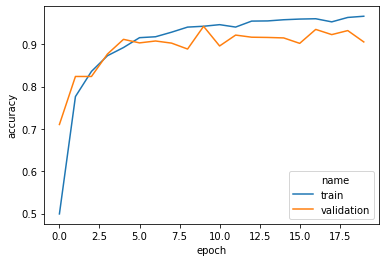

In [22]:
dropout_accuracy_plot = visualize.learning_curves("accuracy", dropout_metrics_df)

In [23]:
visualize.save_plot(dropout_accuracy_plot, f"../reports/figures/{species}-relu.accuracy.png")